# Triton work for "NL I09" and temp eidts of flue, inlt, tank
### target is CHE_FIGN;  is continuos
### is target categorical or conitunuous variable ?????
### what factor affecting target to change
### which object column we need to convert to numbers
### which column we can drop from experience from object or numbers
### we can drop time column
### we have to drop or impute (replace missing values with mean or median) or normalize same as we are doing in our dashboard
### we can drop may be only 5% to 10% data if data set is very large

In [ ]:
BLOWRPWM
CHE_FCDV
CHE_BPDV
FLAMETST
FLAME_ON
C_HEALTH
ALARM_01
ALARM_02
ALARM_03
ALARM_04
FLAMECUR
FANSPEED
VLVSTATE
GASVALVE
S3_EXPRS
S2_INPRS
S1_AIRFL
TANKTEMP
CHE_FIGN
CHE_BMIN
INLTTEMP

In [1]:
# Required Imports 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataframe df1 of "NL I09"
df1 = pd.read_csv("./clean-anes/NL I09.csv")

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,8,9,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#readong first 5 rows of "NL I09"
df1.head()

,Date/Time,WHTRDIFF,FLUETEMP,INLTTEMP,S1_AIRFL,S2_INPRS,S3_EXPRS,CHE_SIGN,ALARM_03,ALARM_04,...,AND2POWR,AND1CURR,AND2CURR,VLVSTATE,ALARM_01,ALARM_02,ECOSTATE,GASVALVE,OCCUPIED,FLOW_GPM
0,2021-04-11 16:37:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-11 16:37:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-11 16:38:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-11 16:38:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-11 16:39:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120914 entries, 0 to 1120913
Data columns (total 33 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1120912 non-null  object 
 1   WHTRDIFF   340781 non-null   float64
 2   FLUETEMP   386143 non-null   object 
 3   INLTTEMP   386143 non-null   object 
 4   S1_AIRFL   386143 non-null   object 
 5   S2_INPRS   386143 non-null   object 
 6   S3_EXPRS   386143 non-null   object 
 7   CHE_SIGN   386143 non-null   float64
 8   ALARM_03   386143 non-null   object 
 9   ALARM_04   386143 non-null   object 
 10  AND3POWR   386143 non-null   float64
 11  AND3CURR   223838 non-null   float64
 12  C_HEALTH   223838 non-null   float64
 13  T_HEALTH   223838 non-null   float64
 14  MODEL_ID   223838 non-null   float64
 15  WHTRSETP   223838 non-null   float64
 16  Station    1120914 non-null  object 
 17  CHE_FIGN   340040 non-null   float64
 18  CHE_BMIN   340040 non-null   float64
 19  

In [5]:
df1.columns

Index(['Date/Time', 'WHTRDIFF', 'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS',
       'S3_EXPRS', 'CHE_SIGN', 'ALARM_03', 'ALARM_04', 'AND3POWR', 'AND3CURR',
       'C_HEALTH', 'T_HEALTH', 'MODEL_ID', 'WHTRSETP', 'Station', 'CHE_FIGN',
       'CHE_BMIN', 'TANKTEMP', 'FLAMECUR', 'FANSPEED', 'AND1POWR', 'AND2POWR',
       'AND1CURR', 'AND2CURR', 'VLVSTATE', 'ALARM_01', 'ALARM_02', 'ECOSTATE',
       'GASVALVE', 'OCCUPIED', 'FLOW_GPM'],
      dtype='object')

In [6]:
df1['Date/Time'].head()

0    2021-04-11 16:37:21
1    2021-04-11 16:37:51
2    2021-04-11 16:38:21
3    2021-04-11 16:38:51
4    2021-04-11 16:39:21
Name: Date/Time, dtype: object

In [7]:
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

In [8]:
df1['Date/Time'].head()

0   2021-04-11 16:37:21
1   2021-04-11 16:37:51
2   2021-04-11 16:38:21
3   2021-04-11 16:38:51
4   2021-04-11 16:39:21
Name: Date/Time, dtype: datetime64[ns]

In [9]:
df1.head()

,Date/Time,WHTRDIFF,FLUETEMP,INLTTEMP,S1_AIRFL,S2_INPRS,S3_EXPRS,CHE_SIGN,ALARM_03,ALARM_04,...,AND2POWR,AND1CURR,AND2CURR,VLVSTATE,ALARM_01,ALARM_02,ECOSTATE,GASVALVE,OCCUPIED,FLOW_GPM
0,2021-04-11 16:37:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-11 16:37:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-11 16:38:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-11 16:38:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-11 16:39:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2 = df1.drop(['Date/Time', 'WHTRSETP', "Station", "MODEL_ID"], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120914 entries, 0 to 1120913
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  340781 non-null  float64
 1   FLUETEMP  386143 non-null  object 
 2   INLTTEMP  386143 non-null  object 
 3   S1_AIRFL  386143 non-null  object 
 4   S2_INPRS  386143 non-null  object 
 5   S3_EXPRS  386143 non-null  object 
 6   CHE_SIGN  386143 non-null  float64
 7   ALARM_03  386143 non-null  object 
 8   ALARM_04  386143 non-null  object 
 9   AND3POWR  386143 non-null  float64
 10  AND3CURR  223838 non-null  float64
 11  C_HEALTH  223838 non-null  float64
 12  T_HEALTH  223838 non-null  float64
 13  CHE_FIGN  340040 non-null  float64
 14  CHE_BMIN  340040 non-null  float64
 15  TANKTEMP  340040 non-null  float64
 16  FLAMECUR  340040 non-null  float64
 17  FANSPEED  340040 non-null  float64
 18  AND1POWR  340040 non-null  float64
 19  AND2POWR  340040 non-null  float64
 20  AN

In [11]:
df3 = df2.dropna(how='all')

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851012 entries, 47402 to 1102504
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  340781 non-null  float64
 1   FLUETEMP  386143 non-null  object 
 2   INLTTEMP  386143 non-null  object 
 3   S1_AIRFL  386143 non-null  object 
 4   S2_INPRS  386143 non-null  object 
 5   S3_EXPRS  386143 non-null  object 
 6   CHE_SIGN  386143 non-null  float64
 7   ALARM_03  386143 non-null  object 
 8   ALARM_04  386143 non-null  object 
 9   AND3POWR  386143 non-null  float64
 10  AND3CURR  223838 non-null  float64
 11  C_HEALTH  223838 non-null  float64
 12  T_HEALTH  223838 non-null  float64
 13  CHE_FIGN  340040 non-null  float64
 14  CHE_BMIN  340040 non-null  float64
 15  TANKTEMP  340040 non-null  float64
 16  FLAMECUR  340040 non-null  float64
 17  FANSPEED  340040 non-null  float64
 18  AND1POWR  340040 non-null  float64
 19  AND2POWR  340040 non-null  float64
 20 

In [13]:
df3['WHTRDIFF'] = df3['WHTRDIFF'].fillna(12)

<ipython-input-13-d44a3f3e54a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WHTRDIFF'] = df3['WHTRDIFF'].fillna(12)


In [14]:
#df3['MODEL_ID'] = df3['MODEL_ID'].fillna(13)

In [15]:
#df['Column'] = pd.to_numeric(df['Column'],errors='coerce')

In [16]:
df3['FLUETEMP'] = pd.to_numeric(df3['FLUETEMP'],errors='coerce')

<ipython-input-16-da92acbefaa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FLUETEMP'] = pd.to_numeric(df3['FLUETEMP'],errors='coerce')


In [17]:
df3['INLTTEMP'] = pd.to_numeric(df3['INLTTEMP'],errors='coerce')

<ipython-input-17-ccf2cb82534f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['INLTTEMP'] = pd.to_numeric(df3['INLTTEMP'],errors='coerce')


In [18]:
df3['INLTTEMP'].dtype

dtype('float64')

In [19]:
df3.FLUETEMP = df3.FLUETEMP.fillna((df3.FLUETEMP.shift() + df3.FLUETEMP.shift(-1))/2)

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df3.INLTTEMP = df3.INLTTEMP.fillna((df3.INLTTEMP.shift() + df3.INLTTEMP.shift(-1))/2)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851012 entries, 47402 to 1102504
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  851012 non-null  float64
 1   FLUETEMP  385541 non-null  float64
 2   INLTTEMP  385541 non-null  float64
 3   S1_AIRFL  386143 non-null  object 
 4   S2_INPRS  386143 non-null  object 
 5   S3_EXPRS  386143 non-null  object 
 6   CHE_SIGN  386143 non-null  float64
 7   ALARM_03  386143 non-null  object 
 8   ALARM_04  386143 non-null  object 
 9   AND3POWR  386143 non-null  float64
 10  AND3CURR  223838 non-null  float64
 11  C_HEALTH  223838 non-null  float64
 12  T_HEALTH  223838 non-null  float64
 13  CHE_FIGN  340040 non-null  float64
 14  CHE_BMIN  340040 non-null  float64
 15  TANKTEMP  340040 non-null  float64
 16  FLAMECUR  340040 non-null  float64
 17  FANSPEED  340040 non-null  float64
 18  AND1POWR  340040 non-null  float64
 19  AND2POWR  340040 non-null  float64
 20 

In [22]:
df3.FLUETEMP = df3.FLUETEMP.fillna(method='ffill')

In [23]:
df3.INLTTEMP = df3.INLTTEMP.fillna(method='ffill')

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851012 entries, 47402 to 1102504
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  851012 non-null  float64
 1   FLUETEMP  851012 non-null  float64
 2   INLTTEMP  851012 non-null  float64
 3   S1_AIRFL  386143 non-null  object 
 4   S2_INPRS  386143 non-null  object 
 5   S3_EXPRS  386143 non-null  object 
 6   CHE_SIGN  386143 non-null  float64
 7   ALARM_03  386143 non-null  object 
 8   ALARM_04  386143 non-null  object 
 9   AND3POWR  386143 non-null  float64
 10  AND3CURR  223838 non-null  float64
 11  C_HEALTH  223838 non-null  float64
 12  T_HEALTH  223838 non-null  float64
 13  CHE_FIGN  340040 non-null  float64
 14  CHE_BMIN  340040 non-null  float64
 15  TANKTEMP  340040 non-null  float64
 16  FLAMECUR  340040 non-null  float64
 17  FANSPEED  340040 non-null  float64
 18  AND1POWR  340040 non-null  float64
 19  AND2POWR  340040 non-null  float64
 20 

In [25]:
df3['TANKTEMP'].unique()

array([  nan, 173.4, 174.8, ..., 113.7, 115.2, 111.6])

In [26]:
#df3['TANKTEMP'].astype(str)

In [27]:
#df3['TANKTEMP'] = df3['TANKTEMP'].str.strip()

In [28]:
#df3['TANKTEMP'].replace('np.nan', 0)

In [29]:
df3['TANKTEMP'].unique()

array([  nan, 173.4, 174.8, ..., 113.7, 115.2, 111.6])

In [30]:
df3.TANKTEMP = df3.TANKTEMP.fillna((df3.TANKTEMP.shift() + df3.TANKTEMP.shift(-1))/2)

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851012 entries, 47402 to 1102504
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  851012 non-null  float64
 1   FLUETEMP  851012 non-null  float64
 2   INLTTEMP  851012 non-null  float64
 3   S1_AIRFL  386143 non-null  object 
 4   S2_INPRS  386143 non-null  object 
 5   S3_EXPRS  386143 non-null  object 
 6   CHE_SIGN  386143 non-null  float64
 7   ALARM_03  386143 non-null  object 
 8   ALARM_04  386143 non-null  object 
 9   AND3POWR  386143 non-null  float64
 10  AND3CURR  223838 non-null  float64
 11  C_HEALTH  223838 non-null  float64
 12  T_HEALTH  223838 non-null  float64
 13  CHE_FIGN  340040 non-null  float64
 14  CHE_BMIN  340040 non-null  float64
 15  TANKTEMP  340099 non-null  float64
 16  FLAMECUR  340040 non-null  float64
 17  FANSPEED  340040 non-null  float64
 18  AND1POWR  340040 non-null  float64
 19  AND2POWR  340040 non-null  float64
 20 

In [32]:
df3['TANKTEMP'] = df3['TANKTEMP'].fillna(method='ffill')

<ipython-input-32-0849761a4a92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TANKTEMP'] = df3['TANKTEMP'].fillna(method='ffill')


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851012 entries, 47402 to 1102504
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  851012 non-null  float64
 1   FLUETEMP  851012 non-null  float64
 2   INLTTEMP  851012 non-null  float64
 3   S1_AIRFL  386143 non-null  object 
 4   S2_INPRS  386143 non-null  object 
 5   S3_EXPRS  386143 non-null  object 
 6   CHE_SIGN  386143 non-null  float64
 7   ALARM_03  386143 non-null  object 
 8   ALARM_04  386143 non-null  object 
 9   AND3POWR  386143 non-null  float64
 10  AND3CURR  223838 non-null  float64
 11  C_HEALTH  223838 non-null  float64
 12  T_HEALTH  223838 non-null  float64
 13  CHE_FIGN  340040 non-null  float64
 14  CHE_BMIN  340040 non-null  float64
 15  TANKTEMP  802862 non-null  float64
 16  FLAMECUR  340040 non-null  float64
 17  FANSPEED  340040 non-null  float64
 18  AND1POWR  340040 non-null  float64
 19  AND2POWR  340040 non-null  float64
 20 

In [34]:
#['Date/Time', 'WHTRDIFF', 'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS',
#       'S3_EXPRS', 'CHE_SIGN', 'ALARM_03', 'ALARM_04', 'AND3POWR', 'AND3CURR',
#       'C_HEALTH', 'T_HEALTH', 'MODEL_ID', 'WHTRSETP', 'Station', 'CHE_FIGN',
#       'CHE_BMIN', 'TANKTEMP', 'FLAMECUR', 'FANSPEED', 'AND1POWR', 'AND2POWR',
#       'AND1CURR', 'AND2CURR', 'VLVSTATE', 'ALARM_01', 'ALARM_02', 'ECOSTATE',
#       'GASVALVE', 'OCCUPIED', 'FLOW_GPM']

In [35]:
#'WHTRDIFF' == 12 every where

In [36]:
#'FLUETEMP', 'INLTTEMP' == average before and after missing measurement

In [37]:
#'S1_AIRFL', 'S2_INPRS', 'S3_EXPRS' == relays, open and close ???? s3 is close and we can drop, keep missing as missing

In [38]:
#'ALARM_01', 'ALARM_02', 'ALARM_03', 'ALARM_04', == keep missing as missing

In [39]:
#'CHE_SIGN' == sign mean successful ignition add one value == keep missing as missing

In [40]:
# 'AND3POWR', 'AND3CURR', == missing as missing

In [41]:
#'C_HEALTH', 'T_HEALTH', == keep missing as missing

In [42]:
#'MODEL_ID',  == model-id 13 every where

In [43]:
# 'WHTRSETP', keep missing as missing; even drop column better

In [44]:
#'CHE_FIGN', == mean failed ignition == keep missing as missing

In [45]:
#'CHE_BMIN', == keep missing as missing

In [46]:
#'TANKTEMP' == average before and after missing measurement

In [47]:
# 'FLAMECUR', == missing as missing

In [48]:
#'FANSPEED', == missing as missing

In [49]:
# 'AND1POWR', 'AND2POWR', == missing as missing, we have to ask sirindi ??? ask Riyan also

In [50]:
# 'AND1CURR', 'AND2CURR' =  missing as missing

In [51]:
#'VLVSTATE' == missing as missing; 

In [52]:
# ECOSTATE' == missing as missing

In [53]:
# 'GASVALVE', == missing as missing

In [54]:
# 'OCCUPIED', == missing as missing; even drop column

In [55]:
# 'FLOW_GPM == missing as missing

In [56]:
#These are first set of object columns to work on
#'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS',
 #      'S3_EXPRS'

In [57]:
# i need to conver "FLUETEMP" to float and is important

# and similarly look at 'INLTTEMP'

In [58]:
df3["S1_AIRFL"].value_counts()

Open      122124
Closed    101435
1.0        90587
0.0        60382
1           5991
0           4078
10.0         960
11.0         274
9.0          170
12.0         130
8.0            6
64             5
64.0           1
Name: S1_AIRFL, dtype: int64

In [59]:
(122124+90587+5991,
101435+4078+60382)

(218702, 165895)

In [60]:
# to change labels of "S1_AIRFL"

S1_AIRFL_dict = {
    'nan': 'nan',
    'Closed': 0,
    1.0: 1,
    "1": 1,
    "0": 0,
    0.0: 0,
    'Open': 1
}

df3["S1_AIRFL"] = df3["S1_AIRFL"].map(S1_AIRFL_dict)

<ipython-input-60-2c0c6d0d7c85>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["S1_AIRFL"] = df3["S1_AIRFL"].map(S1_AIRFL_dict)


In [61]:
df3["S1_AIRFL"].value_counts()

1    218702
0    165895
Name: S1_AIRFL, dtype: int64

In [62]:
df3["S1_AIRFL"].dtype

dtype('O')

In [63]:
df3["S1_AIRFL"].unique()

array([0, 1, nan], dtype=object)

In [64]:
df3['S2_INPRS'].value_counts()

Closed    223553
0.0       150969
0          10069
12.0        1540
Open           6
70             5
70.0           1
Name: S2_INPRS, dtype: int64

In [65]:
# to change labels of "S2_INPRS"

S2_INPRS_dict = {
    'nan': 'nan',
    'Closed': 0,
    "0": 0,
    0.0: 0,
    'Open': 1
}

df3["S2_INPRS"] = df3["S2_INPRS"].map(S2_INPRS_dict)

<ipython-input-65-541e1e00cdf1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["S2_INPRS"] = df3["S2_INPRS"].map(S2_INPRS_dict)


In [66]:
df3['S2_INPRS'].value_counts()

0    384591
1         6
Name: S2_INPRS, dtype: int64

In [67]:
#all closed and so we can drop this column
df3['S3_EXPRS'].value_counts()

Closed    223553
0.0       150969
0          10067
90.7          18
90.9          18
           ...  
113.3          2
94.7           2
110.6          2
115.2          2
64.0           1
Name: S3_EXPRS, Length: 317, dtype: int64

all closed and so we can drop this column

In [68]:
# Remove column name 'S3_EXPRS'
df3=df3.drop(['S3_EXPRS'], axis = 1)

In [69]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851012 entries, 47402 to 1102504
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   WHTRDIFF  851012 non-null  float64
 1   FLUETEMP  851012 non-null  float64
 2   INLTTEMP  851012 non-null  float64
 3   S1_AIRFL  384597 non-null  object 
 4   S2_INPRS  384597 non-null  object 
 5   CHE_SIGN  386143 non-null  float64
 6   ALARM_03  386143 non-null  object 
 7   ALARM_04  386143 non-null  object 
 8   AND3POWR  386143 non-null  float64
 9   AND3CURR  223838 non-null  float64
 10  C_HEALTH  223838 non-null  float64
 11  T_HEALTH  223838 non-null  float64
 12  CHE_FIGN  340040 non-null  float64
 13  CHE_BMIN  340040 non-null  float64
 14  TANKTEMP  802862 non-null  float64
 15  FLAMECUR  340040 non-null  float64
 16  FANSPEED  340040 non-null  float64
 17  AND1POWR  340040 non-null  float64
 18  AND2POWR  340040 non-null  float64
 19  AND1CURR  340040 non-null  float64
 20 

In [70]:
df3['ALARM_03'].value_counts()

                                                    384591
1                                                      932
0                                                      608
T115 Combustion Health Degraded: Needs Service           4
@                                                        4
@@                                                       2
?€                                                       2
Name: ALARM_03, dtype: int64

In [71]:
df3['ALARM_03'].unique()

array(['                                                ',
       'T115 Combustion Health Degraded: Needs Service  ', nan, '@', '@@',
       '?€', '0', '1'], dtype=object)

In [72]:
# to change labels of "ALARM_03"

ALARM_03_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T115 Combustion Health Degraded: Needs Service  ': 'T115 Combustion Health Degraded: Needs Service',
    'nan': np.nan
}

df3["ALARM_03"] = df3["ALARM_03"].map(ALARM_03_dict)

In [73]:
df3['ALARM_03'].unique()

array(['no_alarm', 'T115 Combustion Health Degraded: Needs Service', nan],
      dtype=object)

In [74]:
#df3 = df3.dropna(subset=["ALARM_03"])

In [75]:
df3['ALARM_03'].value_counts()

no_alarm                                          384591
T115 Combustion Health Degraded: Needs Service         4
Name: ALARM_03, dtype: int64

In [76]:
df3['ALARM_04'].value_counts()

                                                    384595
0                                                     1540
?€                                                       6
@                                                        2
Name: ALARM_04, dtype: int64

In [77]:
df3['ALARM_04'].unique()

array(['                                                ', nan, '?€', '@',
       '0'], dtype=object)

In [78]:
# to change labels of "ALARM_03"

ALARM_04_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm"
}

df3["ALARM_04"] = df3["ALARM_04"].map(ALARM_04_dict)

In [79]:
df3['ALARM_04'].value_counts()

no_alarm    384595
Name: ALARM_04, dtype: int64

In [80]:
df3['ALARM_04'].unique()

array(['no_alarm', nan], dtype=object)

In [81]:
# all alarms added and be one with T029 is one and rest all zero

In [82]:
#last set of object columns to deal with
#VLVSTATE', 'ALARM_01', 'ALARM_02', 'ECOSTATE',
 #      'GASVALVE', 'OCCUPIED

In [83]:
df3['VLVSTATE'].value_counts()

2             122235
5             102040
2.0            51764
5.0            31167
10              7769
1.0             6880
3               4803
Post-Purge      3391
1               2363
3.0             1787
7               1665
4               1603
6.0             1272
4.0              486
8                360
6                234
7.0              215
0                  5
Name: VLVSTATE, dtype: int64

In [84]:
df3['VLVSTATE'].unique()

array([nan, '2', '4', '5', 'Post-Purge', '3', '7', '10', '0', '8', '1',
       1.0, '6', 2.0, 5.0, 4.0, 6.0, 3.0, 7.0], dtype=object)

In [85]:
# to change labels of "'VLVSTATE"

VLVSTATE_dict = {
    'nan': 'nan',
    "2": 2,
    2.0: 2,
    "Post-Purge": 6,
    '5': 5,
    5.0: 5,
    "3": 3,
    3.0: 3,
    "7": 7,
    7.0: 7,
    "4": 4,
    4.0: 4,
    "6": 6,
    6.0: 6,
}

df3["VLVSTATE"] = df3["VLVSTATE"].map(VLVSTATE_dict)

In [86]:
df3['VLVSTATE'].value_counts()

2    173999
5    133207
3      6590
6      4897
4      2089
7      1880
Name: VLVSTATE, dtype: int64

In [87]:
df3['VLVSTATE'].unique()

array([nan, 2, 4, 5, 6, 3, 7], dtype=object)

In [88]:
df3['ALARM_01'].value_counts()

                                                    193140
A016 High Tank Temperature. Call Tech Service.       16041
T115 Combustion Health Degraded: Needs Service       11512
T116 Combustion Health Degraded. Needs Service         662
T114 Flame Rod Degraded and Needs Servicing            489
T029 Failed ignition. Retrying.                        312
A104 Water Leak Detected                               207
T009 No Gas detected. Check gas connections            115
T113 Flame Rod Degraded and Needs Servicing             82
A023 Upper Tank temp. too hot. Call Tech Svc.           34
@€                                                       1
Name: ALARM_01, dtype: int64

In [89]:
df3['ALARM_01'].unique()

array([nan, '                                                ',
       'T115 Combustion Health Degraded: Needs Service  ',
       'A023 Upper Tank temp. too hot. Call Tech Svc.   ',
       'T114 Flame Rod Degraded and Needs Servicing     ',
       'T009 No Gas detected. Check gas connections     ',
       'T116 Combustion Health Degraded. Needs Service  ',
       'T029 Failed ignition. Retrying.                 ',
       'A016 High Tank Temperature. Call Tech Service.  ', '@€',
       'A104 Water Leak Detected                        ',
       'T113 Flame Rod Degraded and Needs Servicing     '], dtype=object)

In [90]:
# to change labels of "ALARM_01"

ALARM_01_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T115 Combustion Health Degraded: Needs Service  ': 'T115 Combustion Health Degraded: Needs Service',
    'A023 Upper Tank temp. too hot. Call Tech Svc.   ': 'A023 Upper Tank temp. too hot. Call Tech Svc.',
    'T114 Flame Rod Degraded and Needs Servicing     ': 'T114 Flame Rod Degraded and Needs Servicing',
    'T009 No Gas detected. Check gas connections     ': 'T009 No Gas detected. Check gas connections',
    'T116 Combustion Health Degraded. Needs Service  ': 'T116 Combustion Health Degraded. Needs Service',
    'T029 Failed ignition. Retrying.                 ': 'T029 Failed ignition. Retrying.',
    'A016 High Tank Temperature. Call Tech Service.  ': 'A016 High Tank Temperature. Call Tech Service.',
    'A104 Water Leak Detected                        ': 'A104 Water Leak Detected',
    'T113 Flame Rod Degraded and Needs Servicing     ': 'T113 Flame Rod Degraded and Needs Servicing'
}

df3["ALARM_01"] = df3["ALARM_01"].map(ALARM_01_dict)

In [91]:
df3['ALARM_01'].value_counts()

no_alarm                                          193140
A016 High Tank Temperature. Call Tech Service.     16041
T115 Combustion Health Degraded: Needs Service     11512
T116 Combustion Health Degraded. Needs Service       662
T114 Flame Rod Degraded and Needs Servicing          489
T029 Failed ignition. Retrying.                      312
A104 Water Leak Detected                             207
T009 No Gas detected. Check gas connections          115
T113 Flame Rod Degraded and Needs Servicing           82
A023 Upper Tank temp. too hot. Call Tech Svc.         34
Name: ALARM_01, dtype: int64

In [92]:
df3['ALARM_01'].unique()

array([nan, 'no_alarm', 'T115 Combustion Health Degraded: Needs Service',
       'A023 Upper Tank temp. too hot. Call Tech Svc.',
       'T114 Flame Rod Degraded and Needs Servicing',
       'T009 No Gas detected. Check gas connections',
       'T116 Combustion Health Degraded. Needs Service',
       'T029 Failed ignition. Retrying.',
       'A016 High Tank Temperature. Call Tech Service.',
       'A104 Water Leak Detected',
       'T113 Flame Rod Degraded and Needs Servicing'], dtype=object)

In [93]:
#df3 = df3.dropna(subset=['ALARM_01'])

In [94]:
df3['ALARM_02'].value_counts()

                                                    218337
T115 Combustion Health Degraded: Needs Service        4224
T116 Combustion Health Degraded. Needs Service          22
A023 Upper Tank temp. too hot. Call Tech Svc.           10
Bº@                                                      1
T029 Failed ignition. Retrying.                          1
Name: ALARM_02, dtype: int64

In [95]:
df3['ALARM_02'].unique()

array([nan, '                                                ',
       'T115 Combustion Health Degraded: Needs Service  ',
       'T116 Combustion Health Degraded. Needs Service  ',
       'A023 Upper Tank temp. too hot. Call Tech Svc.   ', 'Bº@',
       'T029 Failed ignition. Retrying.                 '], dtype=object)

In [96]:
# to change labels of "ALARM_02"

ALARM_02_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T115 Combustion Health Degraded: Needs Service  ': 'T115 Combustion Health Degraded: Needs Service',
    'T116 Combustion Health Degraded. Needs Service  ': 'T116 Combustion Health Degraded. Needs Service',
    'A023 Upper Tank temp. too hot. Call Tech Svc.   ': 'A023 Upper Tank temp. too hot. Call Tech Svc.',
    'T029 Failed ignition. Retrying.                 ': 'T029 Failed ignition. Retrying.'
}

df3["ALARM_02"] = df3["ALARM_02"].map(ALARM_02_dict)

In [97]:
df3['ALARM_02'].value_counts()

no_alarm                                          218337
T115 Combustion Health Degraded: Needs Service      4224
T116 Combustion Health Degraded. Needs Service        22
A023 Upper Tank temp. too hot. Call Tech Svc.         10
T029 Failed ignition. Retrying.                        1
Name: ALARM_02, dtype: int64

In [98]:
df3['ALARM_02'].unique()

array([nan, 'no_alarm', 'T115 Combustion Health Degraded: Needs Service',
       'T116 Combustion Health Degraded. Needs Service',
       'A023 Upper Tank temp. too hot. Call Tech Svc.',
       'T029 Failed ignition. Retrying.'], dtype=object)

In [99]:
df3["ECOSTATE"].value_counts()

Closed    148703
0.0        71236
0           2645
Open          10
Name: ECOSTATE, dtype: int64

In [100]:
# to change labels of "ECOSTATE"

ECOSTATE_dict = {
    'nan': 'nan',
    'Closed': 0,
    0.0: 0,
    "0": 0,
    'Open': 1
}

df3["ECOSTATE"] = df3["ECOSTATE"].map(ECOSTATE_dict)

In [101]:
148703+71236+2645

222584

In [102]:
df3["ECOSTATE"].dtype

dtype('O')

In [103]:
#df1["ECOSTATE"].str.astype(int)
df3["ECOSTATE"].value_counts()

0    222584
1        10
Name: ECOSTATE, dtype: int64

In [104]:
df3["ECOSTATE"].unique()

array([nan, 0, 1], dtype=object)

In [105]:
df3["GASVALVE"].value_counts()

Closed    88704
Open      60009
0.0       45424
1.0       25812
0          1674
1           971
Name: GASVALVE, dtype: int64

In [106]:
#zeros
88704+45424+1674

135802

In [107]:
60009+25812+971

86792

In [108]:
# to change labels of "ECOSTATE"

GASVALVE_dict = {
    'nan': 'nan',
    'Closed': 0,
    0.0: 0,
    "0": 0,
    'Open': 1,
    "1": 1,
    1.0: 1,
}

df3["GASVALVE"] = df3["GASVALVE"].map(GASVALVE_dict)

In [109]:
df3["GASVALVE"].value_counts()

0    135802
1     86792
Name: GASVALVE, dtype: int64

In [110]:
df3["OCCUPIED"].value_counts()

Yes    148709
1.0     71236
1        2645
No          4
Name: OCCUPIED, dtype: int64

In [111]:
# to change labels of "OCCUPIED"

OCCUPIED_dict = {
    'nan': 'nan',
    'No': 0,
    1.0: 1,
    "1": 1,
    'Yes': 1
}

df3["OCCUPIED"] = df3["OCCUPIED"].map(OCCUPIED_dict)

In [112]:
df3["OCCUPIED"].value_counts()

1    222590
0         4
Name: OCCUPIED, dtype: int64

In [113]:
148709+71236+2645

222590

In [114]:
df3["OCCUPIED"].unique()

array([nan, 1, 0], dtype=object)

In [115]:
#checking null values
df3.isnull().sum()

WHTRDIFF         0
FLUETEMP         0
INLTTEMP         0
S1_AIRFL    466415
S2_INPRS    466415
CHE_SIGN    464869
ALARM_03    466417
ALARM_04    466417
AND3POWR    464869
AND3CURR    627174
C_HEALTH    627174
T_HEALTH    627174
CHE_FIGN    510972
CHE_BMIN    510972
TANKTEMP     48150
FLAMECUR    510972
FANSPEED    510972
AND1POWR    510972
AND2POWR    510972
AND1CURR    510972
AND2CURR    510972
VLVSTATE    528350
ALARM_01    628418
ALARM_02    628418
ECOSTATE    628418
GASVALVE    628418
OCCUPIED    628418
FLOW_GPM    628417
dtype: int64

In [116]:
#df1.dropna()

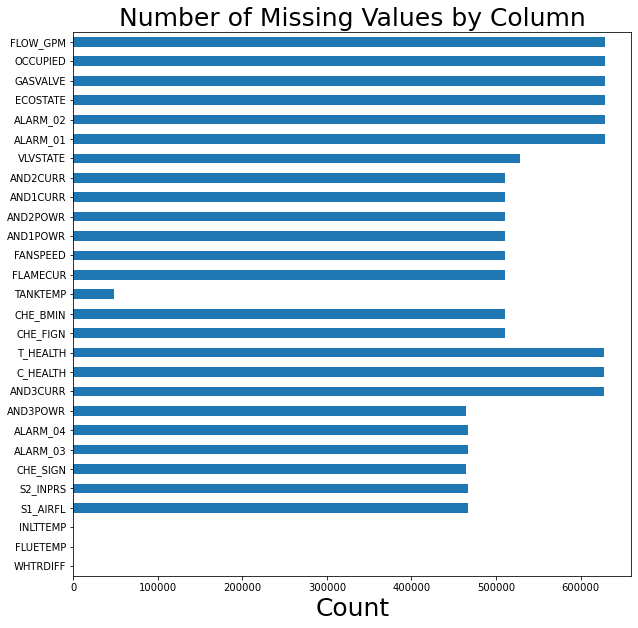

In [117]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (10,10))

df3.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

<AxesSubplot:>

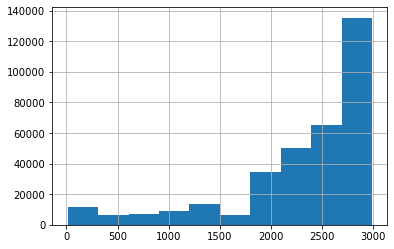

In [118]:
df3['CHE_FIGN'].hist()

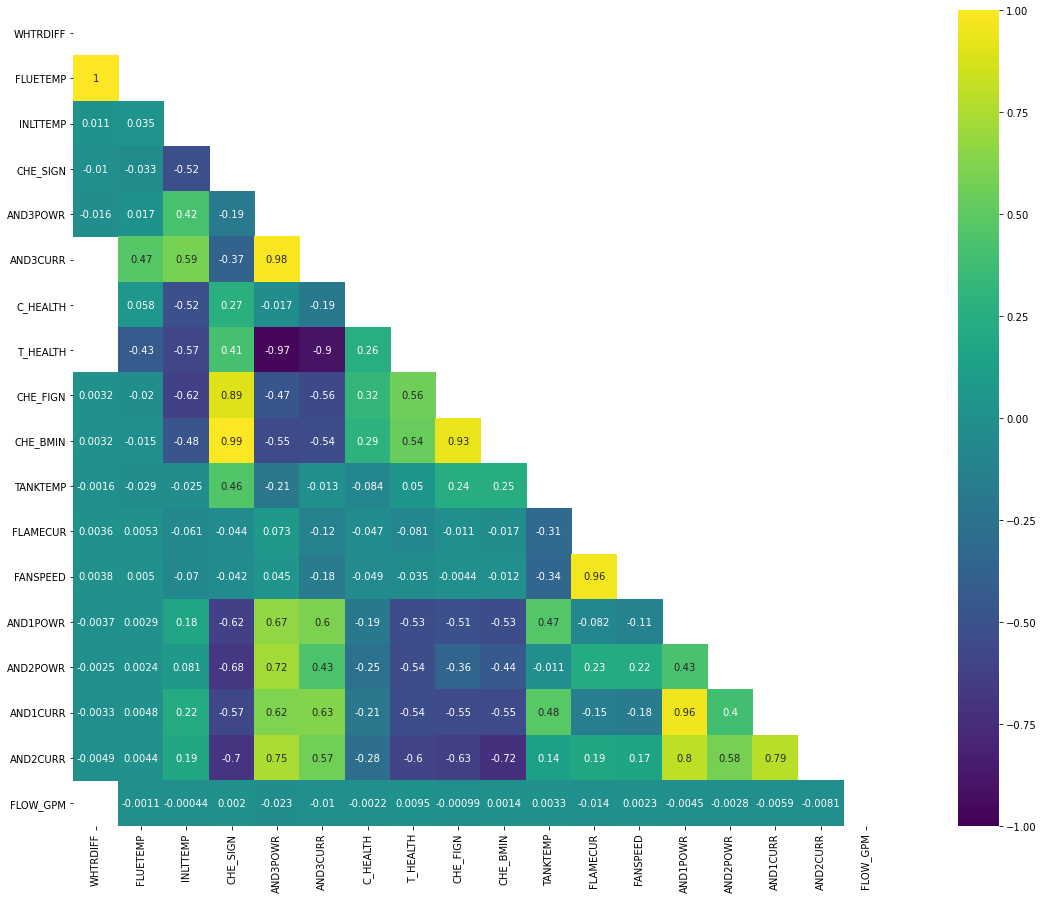

In [119]:
#visual of correlation between fields or columns
plt.figure(figsize=(25, 15))
mask = np.zeros_like(df3.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df3.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);

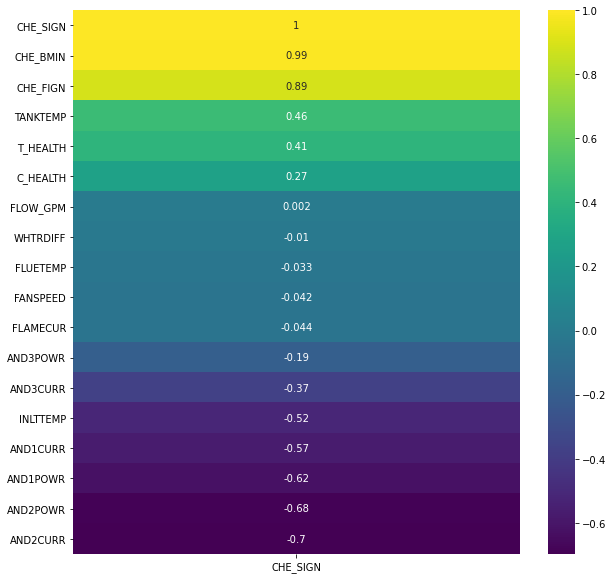

In [136]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df3.corr()[['CHE_SIGN']].sort_values('CHE_SIGN', ascending=False), annot=True, cmap='viridis');

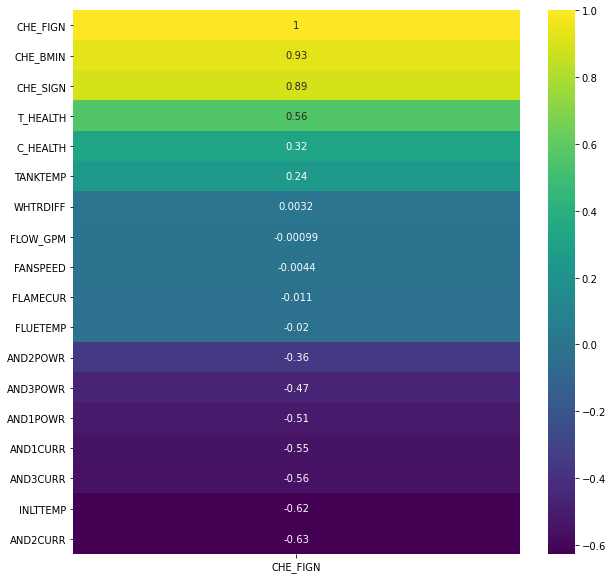

In [120]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df3.corr()[['CHE_FIGN']].sort_values('CHE_FIGN', ascending=False), annot=True, cmap='viridis');

In [121]:
#numeric data from df_data
df_numeric = df3._get_numeric_data()

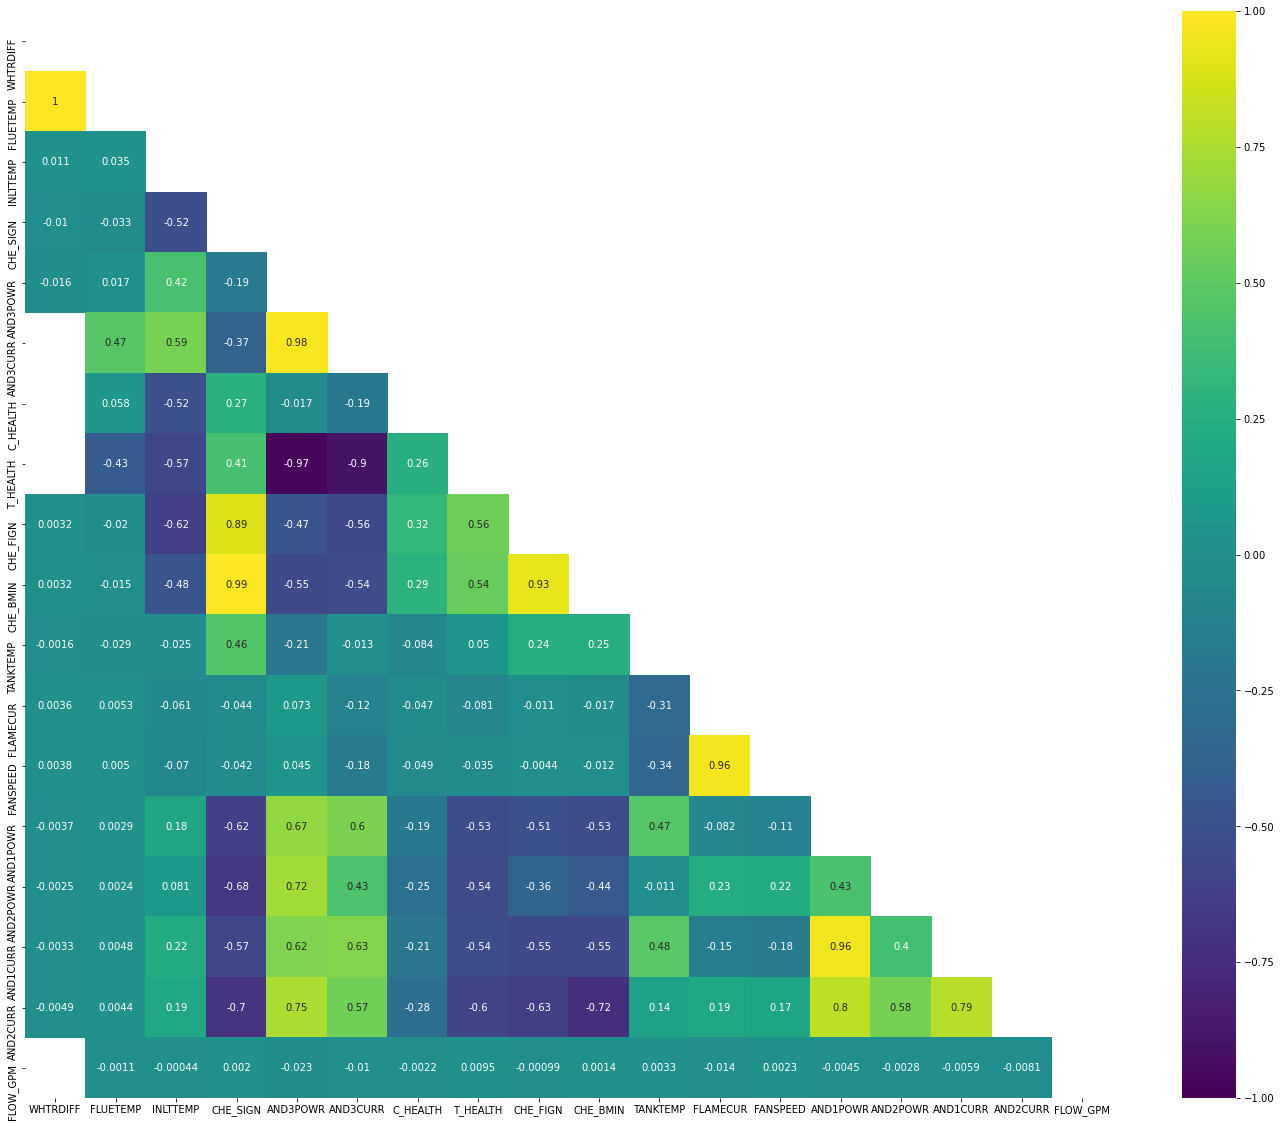

In [122]:
plt.figure(figsize=(25, 20))
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_numeric.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


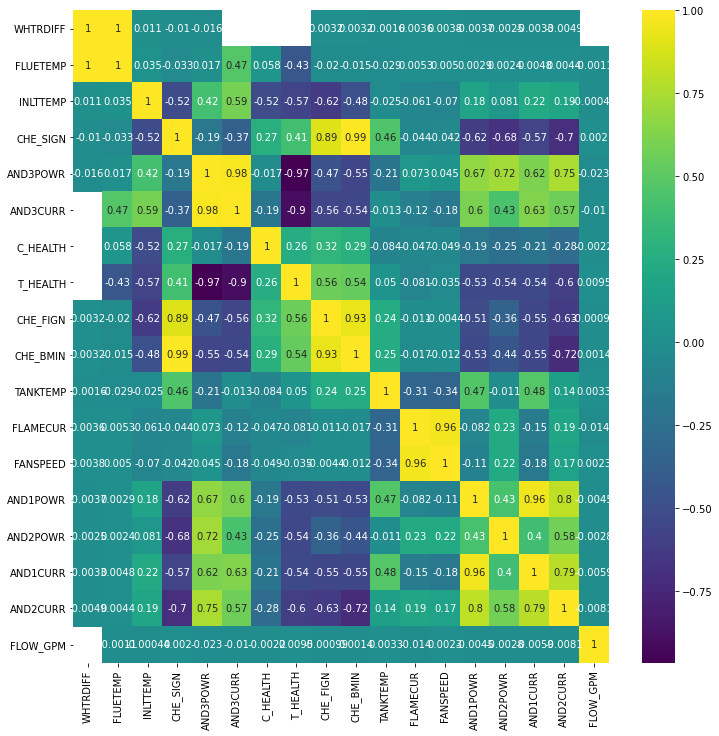

In [123]:
plt.figure(figsize=(12,12))

sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis');

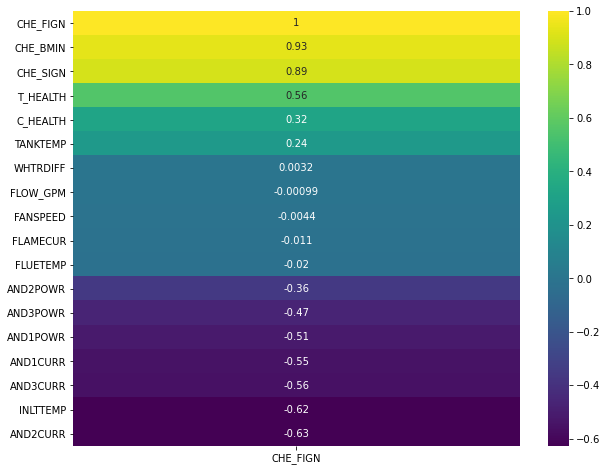

In [124]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['CHE_FIGN']].sort_values('CHE_FIGN', ascending=False), annot=True, cmap='viridis');

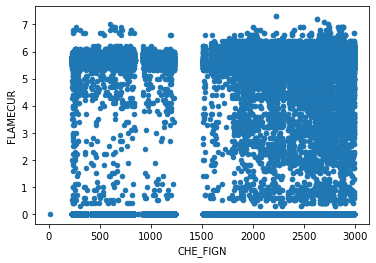

In [125]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df3.plot(kind='scatter', x = 'CHE_FIGN', y='FLAMECUR');

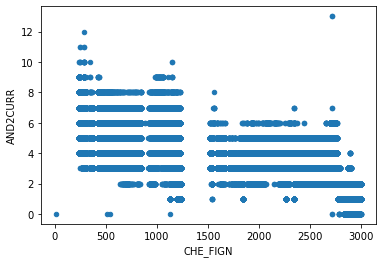

In [126]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df3.plot(kind='scatter', x = 'CHE_FIGN', y='AND2CURR');

In [127]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
#df3.plot(kind='scatter', x = 'CHE_FIGN', y='WHTRSETP');

In [129]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
#df3.plot(kind='scatter', x = 'CHE_FIGN', y='Date/Time');

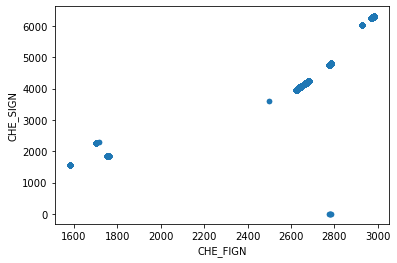

In [130]:
#Scatter plot to see relation between CHE_FIGN and CHE_SIGN
df3.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_SIGN');

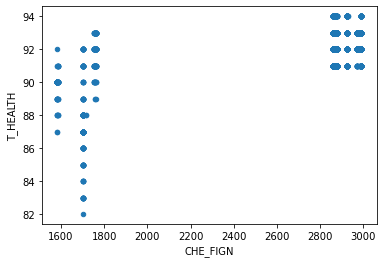

In [131]:
#Scatter plot to see relation between CHE_FIGN and T_HEALTH
df3.plot(kind='scatter', x = 'CHE_FIGN', y='T_HEALTH');

<AxesSubplot:>

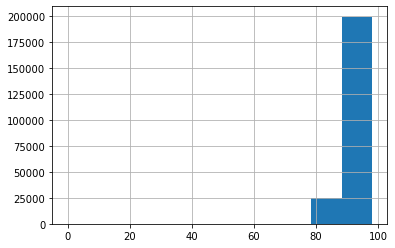

In [132]:
df3['T_HEALTH'].hist()

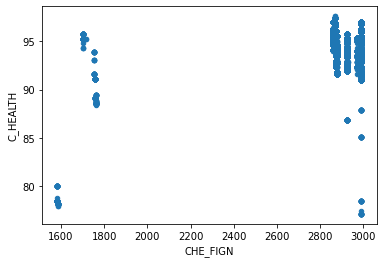

In [133]:
#Scatter plot to see relation between CHE_FIGN and C_HEALTH
df3.plot(kind='scatter', x = 'CHE_FIGN', y='C_HEALTH');

<AxesSubplot:>

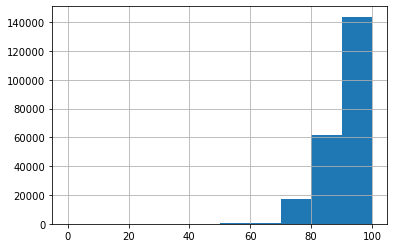

In [134]:
df3['C_HEALTH'].hist()

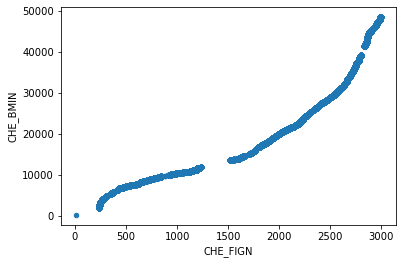

In [135]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df3.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_BMIN');

In [ ]:
#selct and drop any columns
# features = ['column1', 'column2']
#df1_columns = df1[features]
#df1_final = df_final['CHE_FIGN']
#df1_final = df_final.drop(columns=['CHE_FIGN', 'CHE_FIGN'])

In [ ]:
#creating dataframe df2 of "NL I10"
df4 = pd.read_csv("./clean-anes/NL I10.csv")

In [ ]:
#readong first 5 rows of "NL I10"
df4.head()

In [ ]:
# looking at null values and data types of each column for "NL I09"
df4.info()